# Post-Processing Statistical Models in Chapter 7

The model is a quadratic model with random effects. They are multinomial models

In [ ]:
### Load dependencies, data, themes, configurations
rm(list = ls())
#require(c("tidyverse", "tidybayes", "broom", "lavaan", "cowplot", "readstata13", "foreign", "car", "modelr"))
### useful functinon to 0-1 recode
zero.one<-function(x){
  min.x<-min(x, na.rm=T)
  max.x<-max(x-min.x, na.rm=T)
  return((x-min.x)/max.x)
}

library(brms)
library(ggplot2)
library(modelr)
library(tidybayes)
library(dplyr)
library(cowplot)
library(haven)
library(forcats)
library(tidyr)

## Some helper functions, and configurations.
load("/Users/Chris/Dropbox/github_repos/Authoritarianism_V2/clean_data/panel.auth.rda")  ### Just work from this data; everything should be here, recoded.
## models
load("/Users/Chris/Dropbox/github_repos/Authoritarianism_V2/clean_data/chapter7.rda")
dat2000 = tmp_data[[4]]
dat2012 = tmp_data[[5]]
dat2016 = tmp_data[[6]]


In [18]:
ggtheme = theme(
        plot.title=element_text(face="bold",hjust=0,vjust=0,colour="#3C3C3C",size=20),
        axis.text.x=element_text(size=16,colour="#535353",face="bold"),
        axis.text.y=element_text(size=16,colour="#535353",face="bold"),
        axis.title = element_text(size=16,colour="#535353",face="bold"),
        axis.title.y=element_text(size=16,colour="#535353",face="bold",vjust=1.5),
        axis.ticks=element_blank(),
        strip.text.x = element_text(size = 16),
        panel.grid.major=element_line(colour="#D0D0D0",size=.25),
        panel.background=element_rect(fill="white"),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16))
## Voting transitions
table(dat2000$vote1, dat2000$vote2) %>% prop.table(1)
table(dat2012$vote1, dat2012$vote2) %>% prop.table(1)
table(dat2016$vote1, dat2016$vote2) %>% prop.table(1)

## Voting transitions
table(dat2000$pid3.1, dat2000$pid3.2) %>% prop.table(1)
table(dat2012$pid3.1, dat2012$pid3.2) %>% prop.table(1)
table(dat2016$pid3.1, dat2016$pid3.2) %>% prop.table(1)

   
            0         1
  0 0.8636364 0.1363636
  1 0.0609319 0.9390681

   
             0          1
  0 0.91259436 0.08740564
  1 0.04540461 0.95459539

   
             0          1
  0 0.95734597 0.04265403
  1 0.06611570 0.93388430

   
             1          2          3
  1 0.89268293 0.08292683 0.02439024
  2 0.14615385 0.60769231 0.24615385
  3 0.01276596 0.14042553 0.84680851

   
             1          2          3
  1 0.87362637 0.08741259 0.03896104
  2 0.11269488 0.77371938 0.11358575
  3 0.01608849 0.12217195 0.86173957

   
             1          2          3
  1 0.80131363 0.12972085 0.06896552
  2 0.12873862 0.63459038 0.23667100
  3 0.04178273 0.13649025 0.82172702

In [68]:
dat2000 %>%
mutate(independent2004 = recode(pid.2004, `3` = "Lean Democrat" , `4` = "Pure Independent", `5` = "Lean Republican")) %>%
mutate(independent2004 = factor(independent2004, levels=c("Lean Republican", "Pure Independent", "Lean Democrat"))) %>%
mutate(auth_2 = ifelse(dat2000$authoritarianism > quantile(dat2000$authoritarianism, prob = 0.5, na.rm = T), 1, 0)) %>% filter(pid3.1 ==3) %>% select(auth_2, independent2004) %>% table %>% prop.table(1)

Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”


      independent2004
auth_2 Lean Republican Pure Independent Lean Democrat
     0      0.80000000       0.15000000    0.05000000
     1      0.91666667       0.00000000    0.08333333

In [71]:
names(dat2012)

[1] "age.2012"               "approve.2012"           "approve.2016"          
 [4] "approve.2017"           "approve.2018"           "approve.2019"          
 [7] "approve.2020"           "auth1.2016"             "auth2.2016"            
[10] "auth3.2016"             "auth4.2016"             "boomer.gen"            
[13] "buddhist.2012"          "catholic.2012"          "college.2012"          
[16] "data.2012.cdid_2020Nov" "ft.gay1"                "ft.gay2"               
[19] "ftfem.2016"             "ftfem.2017"             "ftgay.2012"            
[22] "ftgay.2016"             "ftgay.2020"             "gaymarry.2012"         
[25] "genx.gen"               "great.gen"              "health.2012"           
[28] "health.2016"            "income.2012"            "jewish.2012"           
[31] "mil.gen"                "other.2012"             "pid.2012a"             
[34] "pid.2012b"              "pid.2016"               "pid.2017"              
[37] "pid.2018"               "pid.2019"               "pid.2020"              
[40] "protestant.2012"        "sex.2012"               "silent.gen"            
[43] "vote.2012"              "vote.2016"              "vote.2020"             
[46] "white.2012"             "auth1"                  "auth2"                 
[49] "auth3"                  "auth4"                  "authoritarianism"      
[52] "vote1"                  "vote2"                  "pid3.1"                
[55] "pid3.2"                 "id"

In [72]:
dat2012 %>%
mutate(independent2016 = recode(pid.2016, `3` = "Lean Democrat" , `4` = "Pure Independent", `5` = "Lean Republican")) %>%
mutate(independent2016 = factor(independent2016, levels=c("Lean Republican", "Pure Independent", "Lean Democrat"))) %>%
mutate(auth_2 = ifelse(dat2012$authoritarianism > quantile(dat2012$authoritarianism, prob = 0.5, na.rm = T), 1, 0)) %>% filter(pid3.1 ==3) %>% select(auth_2, independent2016) %>% table %>% prop.table(1)

Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”


      independent2016
auth_2 Lean Republican Pure Independent Lean Democrat
     0      0.66153846       0.28461538    0.05384615
     1      0.74683544       0.22784810    0.02531646

In [73]:
names(dat2016)

[1] "age.2016"          "age.2020"          "auth.1.2016"      
 [4] "auth.1.2020"       "auth.2.2016"       "auth.2.2020"      
 [7] "auth.3.2016"       "auth.3.2020"       "auth.4.2016"      
[10] "auth.4.2020"       "black.2016"        "black.2020"       
[13] "case_id"           "catholic.2016"     "catholic.2020"    
[16] "college.2016"      "college.2020"      "egal1.2016"       
[19] "egal1.2020"        "egal2.2016"        "egal2.2020"       
[22] "egal3.2016"        "egal3.2020"        "egal4.2016"       
[25] "egal4.2020"        "feeling.dem.2016"  "feeling.dem.2020" 
[28] "feeling.demc.2016" "feeling.demc.2020" "feeling.rep.2016" 
[31] "feeling.rep.2020"  "feeling.repc.2016" "feeling.repc.2020"
[34] "female.2016"       "female.2020"       "hispanic.2016"    
[37] "hispanic.2020"     "ideology.2016"     "ideology.2020"    
[40] "income.2016"       "income.2016.1"     "income.2020"      
[43] "income.2020.1"     "jewish.2016"       "jewish.2020"      
[46] "media.2016"        "media.2020"        "other.2016"       
[49] "other.2020"        "other.race.2016"   "other.race.2020"  
[52] "pid.2016"          "pid.2020"          "protestant.2016"  
[55] "protestant.2020"   "rr1.2016"          "rr1.2020"         
[58] "rr2.2016"          "rr2.2020"          "rr3.2016"         
[61] "rr3.2020"          "rr4.2016"          "rr4.2020"         
[64] "trust1.2016"       "trust1.2020"       "trust2.2016"      
[67] "trust2.2020"       "trust3.2016"       "trust3.2020"      
[70] "trust4.2016"       "trust4.2020"       "vote.2016"        
[73] "vote.2020"         "vote.house.2016"   "vote.house.2020"  
[76] "vote.senate.2016"  "vote.senate.2020"  "white.2016"       
[79] "white.2020"        "auth1"             "auth2"            
[82] "auth3"             "auth4"             "authoritarianism" 
[85] "vote1"             "vote2"             "pid3.1"           
[88] "pid3.2"            "id"

In [75]:
dat2016 %>%
mutate(independent2020 = recode(pid.2020, `3` = "Lean Democrat" , `4` = "Pure Independent", `5` = "Lean Republican")) %>%
mutate(independent2020 = factor(independent2020, levels=c("Lean Republican", "Pure Independent", "Lean Democrat"))) %>%
mutate(auth_2 = ifelse(dat2016$authoritarianism > quantile(dat2016$authoritarianism, prob = 0.5, na.rm = T), 1, 0)) %>% filter(pid3.1 ==3) %>% select(auth_2, independent2020) %>% table %>% prop.table(1)

Warning message:
“Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”


      independent2020
auth_2 Lean Republican Pure Independent Lean Democrat
     0      0.56666667       0.20000000    0.23333333
     1      0.63157895       0.28947368    0.07894737

In [46]:
ifelse(dat2000$authoritarianism > quantile(dat2000$authoritarianism, prob = 0.5, na.rm = T), 1, 0)

[1]  1  0  1  1  0  1  0  0  0  1 NA  1  0  1 NA  1  1  0  1  1 NA  0  1  1
  [25]  1  0 NA NA  0  0  0  1  0  1  0  1  0  0  1  0  1  1  0  0  0  1  0  1
  [49] NA  1  1  0  1  0  0  0  1  0  1  1  0  1 NA  1  1  0  0  1  1  1  1  1
  [73]  0 NA  0  0  0  0  1  0 NA  0  1  0  0  1  0 NA  0  0  0  0  1  0  0  1
  [97]  1  0  1  0 NA  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0  0  0  1
 [121]  1  0  1  0  1  1  1  0  0  0  1  0  1 NA  1  1  0  0  0  0 NA  1  0  0
 [145]  1  0  0  0  1  0 NA  0  0  1  0  0  0  0  1  0  1  0  0  0  0  1 NA  1
 [169]  0  1  0  1  0  1  1  1  0  0  1  0  0  0  1  1  0  0  1  0  1  0  0  1
 [193]  0  1  0  0  0  0  1  0  1  0  0  0 NA  1 NA  0  1  0  1  0  0  0  0 NA
 [217]  1  0  0  0  0  0  0 NA  0  1  0  0  1  1  0  0  0  0  0  0  0  1  0  0
 [241]  0  1  1 NA  0 NA  0  0  1  1  1  1  0 NA  0  1  1 NA  0 NA NA  0  0  1
 [265]  0  1  0  1  1  1  0  0  0  0 NA  0  0  0 NA  0 NA  1  0 NA  0  0  0  0
 [289] NA  1  0  0  1  0  0  0  0 NA  0  0  0  1  0  1  0  0  0  0  0  0  0  0
 [313]  1  0  0  0  1  1  1  1  1  0  0  0  0  0  1  0  0  0 NA  1  1 NA  0  0
 [337]  0  1 NA  1  0  0  1  0  0  0  1  1  0  1  0  0 NA NA  0  1  0  0 NA  1
 [361]  1  0  0  1  1  1  0  1 NA  0  1  0  0  0  0 NA  0 NA  0  0  1  0  1  1
 [385]  1  0  1 NA  1  0  0  1  0  0 NA  0 NA NA  0 NA  1  0  0  0  0 NA  0  0
 [409]  0  0  0  0 NA  0  1  1  0  0  0  0  0  1  1  0  0  1  0  0  0  1  1  0
 [433]  1  1  1  0  0  0  0  0  0  0  1  1  0  1  1  1  1  0  1  1 NA  1  0  0
 [457]  1  0  1  1  1  1  0  1  0  0 NA  1  0  1  1  1  0  0  0  1  0  1  0  0
 [481] NA  1  1  1 NA  0 NA  0  0  1  0  1  1 NA  0  0  0  0  0  0  0  1  0  0
 [505]  0  1  0  0  0  0  1  0  1  0  1  1  1  0  0  1  1  1  1  0  0 NA  0  0
 [529]  1  0  0  0  1  0  0  1  0  0  1  0  1  1  1  1  1  1  0  0  0  0  1  0
 [553]  0  1  0  1  0  1 NA  0  0  1  0  1  1  0  0  1  0  1  1  1 NA  0  0  1
 [577]  0  0  0  0  0  1  0  1  0  1 NA NA NA  0 NA  1  0  1  1  1  1 NA  0  0
 [601]  0  0  0  0  1  0  1  1 NA  1  1  1  1  1  1  0  0  0 NA  0  0  0  0  0
 [625]  1  1 NA  0  0  1  0  0  1  1  1  1  0  1  1  0  1  1  0  1  0  0  0  0
 [649]  1  1  0  0  1  0  0  0  0 NA NA  0  1  0 NA NA  0  1  0  0  1  1 NA  0
 [673]  1  1 NA  0  0  1  1  0  1  1  0  0  1  1  1  1  1  1  0  0  1  0  1  0
 [697]  0  1  0  0  0  1  1  0 NA  0  0  0  1  0  0  0  0  1  1  1  0  0  0  1
 [721]  0  0  0  0  1  1  0  0  0  0  0  0  0  1  1 NA NA  0  0  1 NA  0  1 NA
 [745]  0  0 NA  0  0  0  1  0  0  1  0  0  1  1  1  0 NA  1  0  0  1 NA  0  0
 [769]  1  0  0  1  1  0  0  1  0 NA NA  1  0  0  0 NA  0  0  0  0  0  0  0  0
 [793]  1  0 NA NA  0  0  0  0  0  1  0  1  0  0  0  0  1 NA  1  0  0  0  0  0
 [817]  1  0  0  0  0  1  0 NA  0  0  0  0 NA  0  0  0  0  1  0  1  1  0  0  1
 [841]  0  1 NA  1  0  0  0  0 NA  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 [865] NA  0  1  1  0  0  0  0 NA  0  0  1 NA  0  1  1  1  0  1  0  0  0  0  0
 [889]  0  1  1 NA  0  0  0  1  1  0  0  0  1  0  1 NA  1  0  0 NA  1  1  0  1
 [913]  0  0  1  0  0 NA  0  0  0  0  0 NA  0  0  0 NA NA  0  0 NA  0  1  0  0
 [937] NA  0  1  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0 NA NA  1 NA  1  1
 [961]  0  1  0  0  0  0  0  0  0 NA  1  1  0  0  0  1  0  1 NA  0 NA  0  1  0
 [985]  0  1  0  0  1  1  0 NA  0  0  1  0 NA  1  0  0  0  1  1  0 NA  0 NA NA
[1009]  1  0  0  0 NA NA  0  0  0  1  1  0  0  0  0  0  1  0  0  0  1  0  1 NA
[1033]  0  1  0  0  1  1 NA  0 NA  0  0  0  0  1 NA NA  0  1 NA  1  0  1  1  0
[1057]  0 NA  0  1  0 NA  0  0  0 NA  1 NA  0  0  0  0  0  1  0  1  1  0  0  1
[1081]  0  1  1 NA  1  0 NA  1  0  0  0  0  0  0 NA NA  1 NA NA  1  0  0  0  0
[1105]  0  1  0  0  1  0  0  0 NA  1  1  1  0  0  1 NA  1  1  0  0  0  0  1  0
[1129]  0  0 NA  0  0 NA NA  0  0  0  0  1  1  0 NA  0  1 NA  1  1  0  0  0  0
[1153]  0  0  1  0  1  0  0  1  1  0  0  0  0  1  0  0  0  0  0  1  0  0  1  0
[1177]  0  0  0  0  0 NA  0  1  0  0  1  0  0  0  1  0  1  1  1  0  0  1 NA  1
[1201]  0  0  1  0  1  1  0  1  0  0  0  0  0  1  0 N

# Party Identification Models

In [3]:
dat[[4]]%>% as.formula
dat[[5]]%>% as.formula
dat[[6]]%>% as.formula

pid3.2 ~ sex.2000 + age.2000 + college.2000 + income.2000 + authoritarianism + authoritarianism_2 + republican + independent + authoritarianism:republican + authoritarianism_2:republican + authoritarianism:independent + authoritarianism_2:independent 

pid3.2 ~ sex.2012 + sex.2012 + college.2012 + income.2012 + authoritarianism + authoritarianism_2 + republican + independent + authoritarianism:republican + authoritarianism_2:republican + authoritarianism:independent + authoritarianism_2:independent 

pid3.2 ~ female.2016 + age.2016 + college.2016 + income.2016 + authoritarianism + authoritarianism_2 + republican + independent + authoritarianism:republican + authoritarianism_2:republican + authoritarianism:independent + authoritarianism_2:independent 

`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


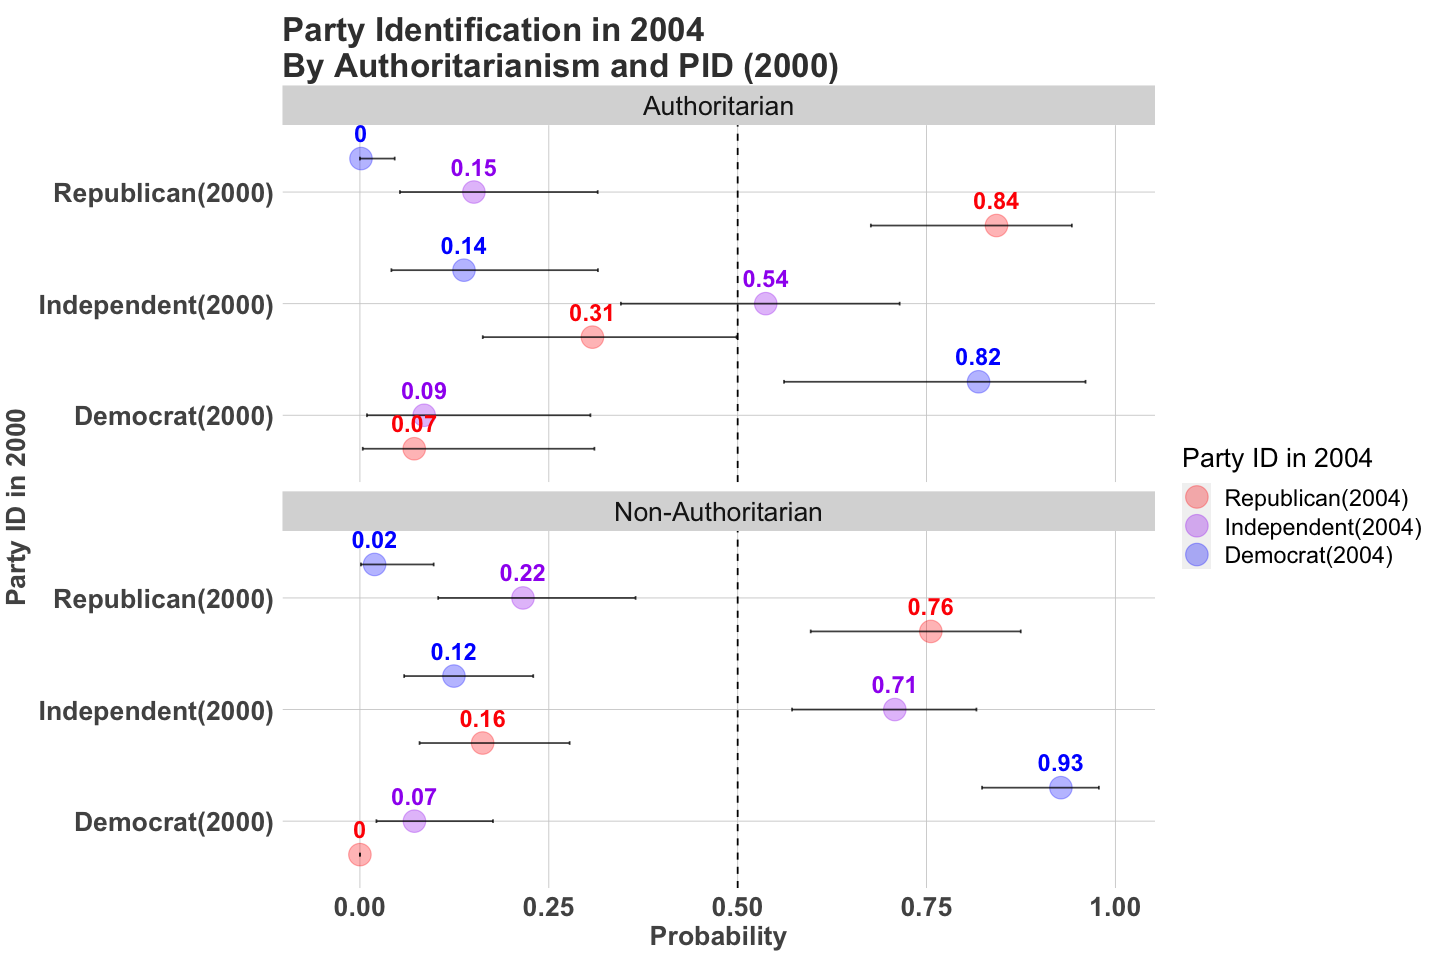

In [13]:
options(repr.plot.width=12, repr.plot.height=8)


zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T),
            age.2000 = mean(age.2000, na.rm = T),
            college.2000 = mean(college.2000, na.rm = T),
            income.2000 = mean(income.2000, na.rm = T),
            authoritarianism = seq_range(authoritarianism, n = 2),
            republican = c(0,1),
            independent =c(0,1)) %>%
                                  filter(!(republican ==1 & independent ==1)) %>%

                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[4]]) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2004)", `2` = "Independent(2004)", `3` = "Republican(2004)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2000)",
                                                ifelse(republican ==1 & independent ==0, "Republican(2000)",
                                                    "Independent(2000)")))  %>%
                       group_by(outcome, Authoritarianism, Partisanship) %>%
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975)) %>%
                    mutate(outcome = factor(outcome, levels=c("Republican(2004)", "Independent(2004)", "Democrat(2004)"))) %>%

 ggplot(aes(x = as.factor(Partisanship),
                  y = mean, ymin=max,
                  colour = outcome,
                  group = outcome,
                  ymax=min, label = round(mean,2)))+
facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Party Identification in 2004\nBy Authoritarianism and PID (2000)") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("Party ID in 2000") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Party ID in 2004", values=c("red", "purple", "blue")) +
  coord_flip()

In [5]:
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T),
            age.2000 = mean(age.2000, na.rm = T),
            college.2000 = mean(college.2000, na.rm = T),
            income.2000 = mean(income.2000, na.rm = T),
            authoritarianism = seq_range(authoritarianism, n = 2),
            republican = c(0,1),
            independent =c(0,1)) %>%
                                  filter(!(republican ==1 & independent ==1)) %>%

                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[4]]) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2004)", `2` = "Independent(2004)", `3` = "Republican(2004)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2000)",
                                                ifelse(republican ==1 & independent ==0, "Republican(2000)",
                                                    "Independent(2000)")))  %>%
                       group_by(outcome, Authoritarianism, Partisanship) %>%
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975))

`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


outcome,Authoritarianism,Partisanship,mean,min,max
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Democrat(2004),Authoritarian,Democrat(2000),8.188414e-01,5.613291e-01,9.604527e-01
Democrat(2004),Authoritarian,Independent(2000),1.377343e-01,4.165208e-02,3.150869e-01
Democrat(2004),Authoritarian,Republican(2000),1.419533e-03,3.332864e-07,4.606093e-02
Democrat(2004),Non-Authoritarian,Democrat(2000),9.278318e-01,8.234599e-01,9.781503e-01
Democrat(2004),Non-Authoritarian,Independent(2000),1.244553e-01,5.853839e-02,2.294414e-01
Democrat(2004),Non-Authoritarian,Republican(2000),1.943764e-02,1.336704e-03,9.763251e-02
Independent(2004),Authoritarian,Democrat(2000),8.504932e-02,9.324432e-03,3.050994e-01
Independent(2004),Authoritarian,Independent(2000),5.371444e-01,3.454126e-01,7.144096e-01
Independent(2004),Authoritarian,Republican(2000),1.508655e-01,5.296085e-02,3.147459e-01


# The 2012-2016 Data

`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


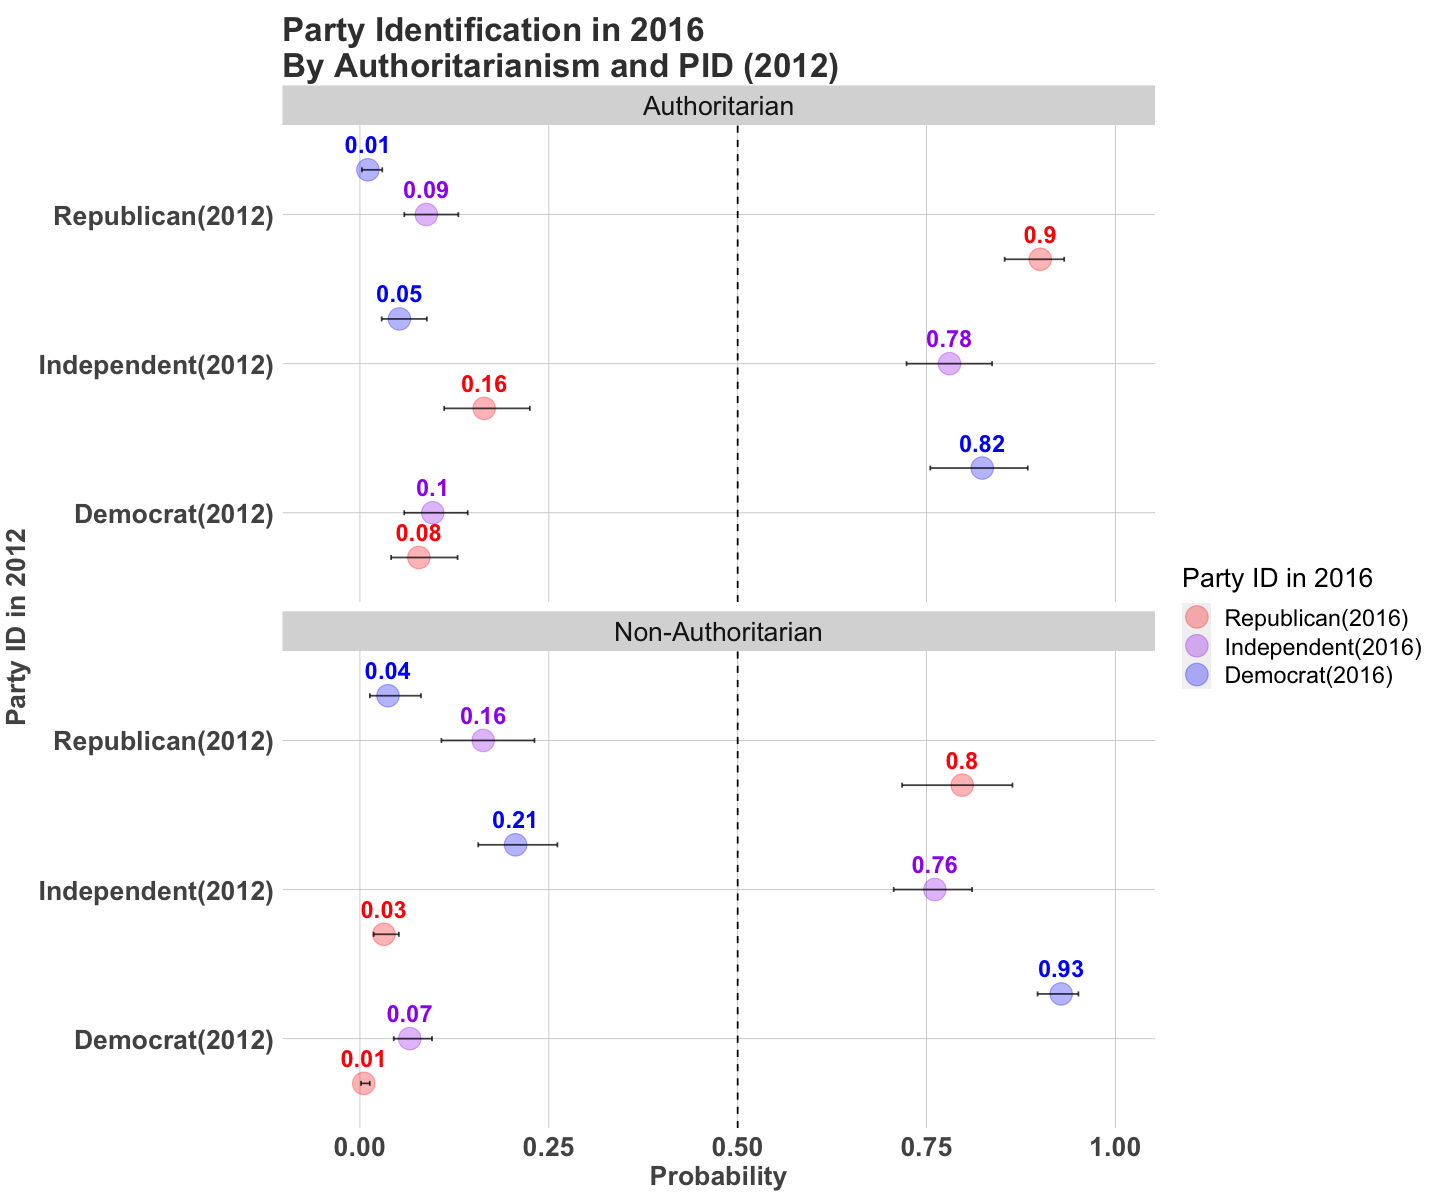

In [15]:
options(repr.plot.width=12, repr.plot.height=10)
#############################################################################################################################
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T), age.2012 = mean(age.2012, na.rm = T),
                       college.2012 = c(0,1),
                       income.2012 = mean(income.2012, na.rm = T),
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>%
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[5]]) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2016)", `2` = "Independent(2016)", `3` = "Republican(2016)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2012)",
                                                ifelse(republican ==1 & independent ==0, "Republican(2012)",
                                                    "Independent(2012)")))  %>%
                      filter(!(republican ==1 & independent ==1)) %>%

                       group_by(outcome, Authoritarianism, Partisanship) %>%
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975)) %>%
                    mutate(outcome = factor(outcome, levels=c("Republican(2016)", "Independent(2016)", "Democrat(2016)"))) %>%


 ggplot(aes(x = as.factor(Partisanship),
                  y = mean, ymin=max,
                  colour = outcome,
                  group = outcome,
                  ymax=min, label = round(mean,2)))+
facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Party Identification in 2016\nBy Authoritarianism and PID (2012)") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("Party ID in 2012") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Party ID in 2016", values=c("red", "purple", "blue")) +
  coord_flip()

`summarise()` has grouped output by 'outcome', 'Authoritarianism'. You can
override using the `.groups` argument.


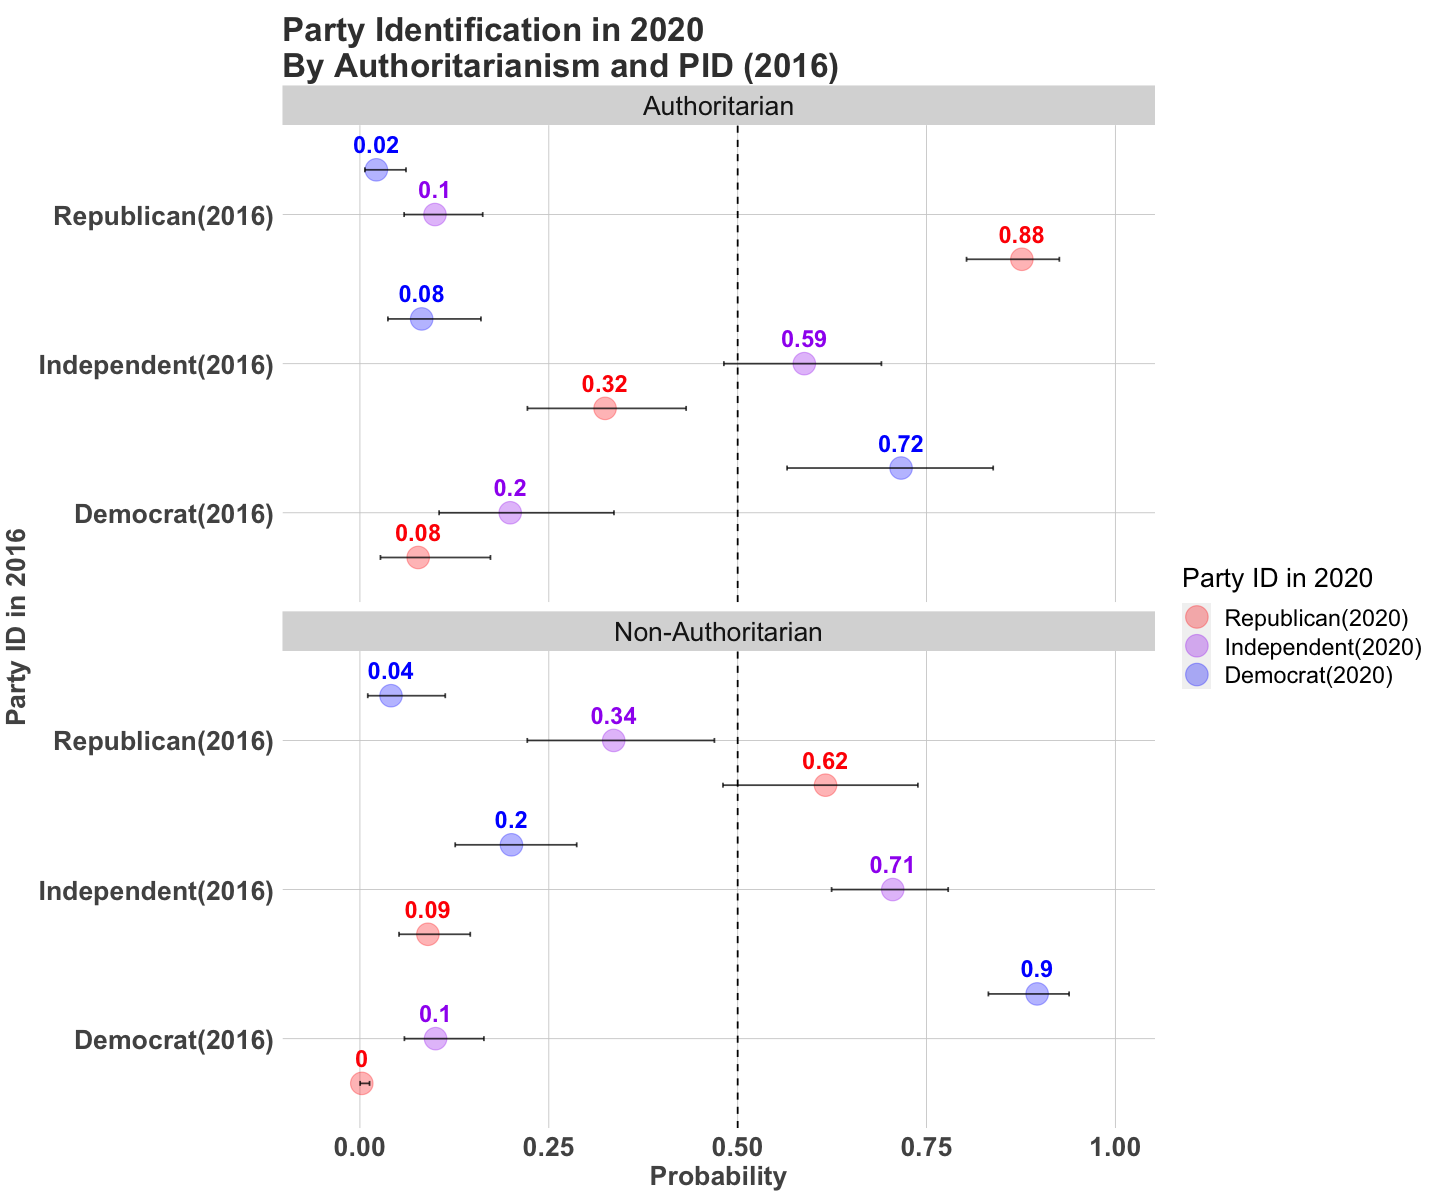

In [16]:
options(repr.plot.width=12, repr.plot.height=10)
#############################################################################################################################
zap_labels(dat2016) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(female.2016 = mean(female.2016, na.rm = T), age.2016 = mean(age.2016, na.rm = T),
                       college.2016 = c(0,1), income.2016 = mean(income.2016, na.rm = T),
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       republican = c(0,1),
                       independent =c(0,1)) %>%
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_epred_draws(dat[[6]]) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(outcome = recode(.category, `1` = "Democrat(2020)", `2` = "Independent(2020)", `3` = "Republican(2020)")) %>%
                       mutate(Partisanship = ifelse(republican == 0 & independent ==0, "Democrat(2016)",
                                                ifelse(republican ==1 & independent ==0, "Republican(2016)",
                                                    "Independent(2016)")))  %>%
                      filter(!(republican ==1 & independent ==1)) %>%
                       group_by(outcome, Authoritarianism, Partisanship) %>%
                      summarize(mean = quantile(.epred, prob =  0.5),
                                min  = quantile(.epred, prob = 0.025),
                                max  = quantile(.epred, prob = 0.975)) %>%
                      mutate(outcome = factor(outcome, levels=c("Republican(2020)", "Independent(2020)", "Democrat(2020)"))) %>%



 ggplot(aes(x = as.factor(Partisanship),
                  y = mean, ymin=max,
                  colour = outcome,
                  group = outcome,
                  ymax=min, label = round(mean,2)))+
facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Party Identification in 2020\nBy Authoritarianism and PID (2016)") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("Party ID in 2016") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Party ID in 2020", values=c("red", "purple", "blue")) +
  coord_flip()




I'm happy to manually put this information in word -- a 2x2 transition matrix. However, I played around with the presentation below.  

# Voting

If voting is at the end of the chapter, it seems reasonable to combine years, though let me know if either of you believe this is problematic. It just seems that at the end of the chapter, the reader should be familiar with reading these results, voting is binary -- and even simpler to interpret -- and the chapter was already pretty dense. What I do below is produce the predictions for each year, and then combine into a large table called vote_choice_combined.



In [14]:
options(repr.plot.width=6, repr.plot.height=5)
plot_vote_2000 =zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T), age.2000 = mean(age.2000, na.rm = T),
                       college.2000 = mean(college.2000, na.rm = T), income.2000 = mean(income.2000, na.rm = T),
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>%
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[1]]) %>%
                       mutate(Vote_Republican = plogis(.linpred)) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1, "Bush(2000)", "Gore(2000)")) %>%
                       mutate(Voter = factor(Voter, levels=c("Bush(2000)", "Gore(2000)"))) %>%
                       group_by(Voter, Authoritarianism)
            # Hard coded: Be careful
vote_2000 = rbind(
        plot_vote_2000     %>% group_by(Voter, Authoritarianism) %>%
                                summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)
                                ),
         plot_vote_2000     %>% group_by(Voter, Authoritarianism) %>%
                                summarize(
                                mean = quantile(1 - Vote_Republican, prob =  0.5),
                                max  = quantile(1 - Vote_Republican, prob =  0.975),
                                min  = quantile(1 - Vote_Republican, prob = 0.025)
                                ))   %>% data.frame() %>%
                             mutate(vote = rep(c("Bush(2004)", "Kerry(2004)"), each = 4)) %>%
                             mutate(vote = factor(vote, levels=c("Bush(2004)", "Kerry(2004)")))
vote_2000

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


Voter,Authoritarianism,mean,min,max,vote
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
Bush(2000),Authoritarian,0.94069299,0.815952016,0.98738604,Bush(2004)
Bush(2000),Non-Authoritarian,0.91673938,0.816863389,0.97140350,Bush(2004)
Gore(2000),Authoritarian,0.25949247,0.075068661,0.53570045,Bush(2004)
Gore(2000),Non-Authoritarian,0.01767172,0.002970323,0.06959041,Bush(2004)
Bush(2000),Authoritarian,0.05930701,0.012613964,0.18404798,Kerry(2004)
Bush(2000),Non-Authoritarian,0.08326062,0.028596502,0.18313661,Kerry(2004)
Gore(2000),Authoritarian,0.74050753,0.464299549,0.92493134,Kerry(2004)
Gore(2000),Non-Authoritarian,0.98232828,0.930409589,0.99702968,Kerry(2004)


In [15]:
library(tidyr)
paste("The probability of voting for Trump in 2016", "", "at high and low levels of authoritarianism  and 2012 vote choice:")
#############################################################################################################################
plot_vote_2012 = zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T), age.2012 = mean(age.2012, na.rm = T),
                       college.2012 = mean(college.2012, na.rm = T), income.2012 = mean(income.2012, na.rm = T),
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>%
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[2]]) %>%
                       mutate(Vote_Republican = plogis(.linpred)) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Romney(2012)", "Obama(2012)"))


            # Hard coded: Be careful
vote_2012 = rbind(
        plot_vote_2012     %>% group_by(Voter, Authoritarianism) %>%
                                summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)
                                ),
         plot_vote_2012     %>% group_by(Voter, Authoritarianism) %>%
                                summarize(
                                mean = quantile(1 - Vote_Republican, prob =  0.5),
                                max  = quantile(1 - Vote_Republican, prob =  0.975),
                                min  = quantile(1 - Vote_Republican, prob = 0.025)
                                ))   %>% data.frame() %>%
                             mutate(vote = rep(c("Trump(2016)", "Clinton(2016)"), each = 4))



[1] "The probability of voting for Trump in 2016  at high and low levels of authoritarianism  and 2012 vote choice:"

`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


In [16]:
plot_vote_2016 = zap_labels(dat2016) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(female.2016 = mean(female.2016, na.rm = T), age.2016 = mean(age.2016, na.rm = T),
                       college.2016 = mean(college.2016, na.rm = T), income.2016 = mean(income.2016, na.rm = T),
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>%
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[3]]) %>%
                       mutate(Vote_Republican = plogis(.linpred)) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Trump(2016)", "Clinton(2016)")) %>%
                       group_by(Voter, Authoritarianism)

vote_2016 = rbind(
        plot_vote_2016     %>% group_by(Voter, Authoritarianism) %>%
                                summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)
                                ),
         plot_vote_2016     %>% group_by(Voter, Authoritarianism) %>%
                                summarize(
                                mean = quantile(1 - Vote_Republican, prob =  0.5),
                                max  = quantile(1 - Vote_Republican, prob =  0.975),
                                min  = quantile(1 - Vote_Republican, prob = 0.025)
                                ))   %>% data.frame() %>%
                             mutate(vote = rep(c("Trump(2020)", "Biden(2020)"), each = 4))


`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Voter'. You can override using the
`.groups` argument.


In [17]:
plot_dat = data.frame(rbind(vote_2000, vote_2012, vote_2016)) %>%
            mutate(election_year = rep(c("2000-2004", "2012-2016", "2016-2020"), each = 8))
plot_dat

Voter,Authoritarianism,mean,min,max,vote,election_year
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Bush(2000),Authoritarian,0.94069299,0.815952016,0.98738604,Bush(2004),2000-2004
Bush(2000),Non-Authoritarian,0.91673938,0.816863389,0.97140350,Bush(2004),2000-2004
Gore(2000),Authoritarian,0.25949247,0.075068661,0.53570045,Bush(2004),2000-2004
Gore(2000),Non-Authoritarian,0.01767172,0.002970323,0.06959041,Bush(2004),2000-2004
Bush(2000),Authoritarian,0.05930701,0.012613964,0.18404798,Kerry(2004),2000-2004
Bush(2000),Non-Authoritarian,0.08326062,0.028596502,0.18313661,Kerry(2004),2000-2004
Gore(2000),Authoritarian,0.74050753,0.464299549,0.92493134,Kerry(2004),2000-2004
Gore(2000),Non-Authoritarian,0.98232828,0.930409589,0.99702968,Kerry(2004),2000-2004
Obama(2012),Authoritarian,0.21649649,0.163120798,0.28098316,Trump(2016),2012-2016


In [36]:
# This should be cleaned up, it combines plots in ggarrange
options(repr.plot.width=8, repr.plot.height=6)

p1 = plot_dat %>% subset(election_year =="2000-2004") %>%
mutate(Voter = factor(Voter, levels=c("Gore(2000)", "Bush(2000)"))) %>%

ggplot(aes(x = as.factor(Voter),
                  y = mean, ymin=max,
                  colour = vote,
                  group = vote,
                  ymax=min, label = round(mean,2)))+
facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
    ggtitle("Voting(2000-2004)") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("Vote in 2000") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Vote ", values=c("blue",  "red")) +
  coord_flip()


p2 = plot_dat %>% subset(election_year =="2012-2016") %>%
ggplot(aes(x = as.factor(Voter),
                  y = mean, ymin=max,
                  colour = vote,
                  group = vote,
                  ymax=min, label = round(mean,2)))+
facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=5, alpha = 0.3, position = position_dodge(width = 0.5)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.5)) +
  ggtitle("Voting(2012-2016)") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("Vote in 2012") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.5), show.legend = FALSE)+
  scale_colour_manual(name="Vote ", values=c("red",  "blue")) +
  coord_flip()



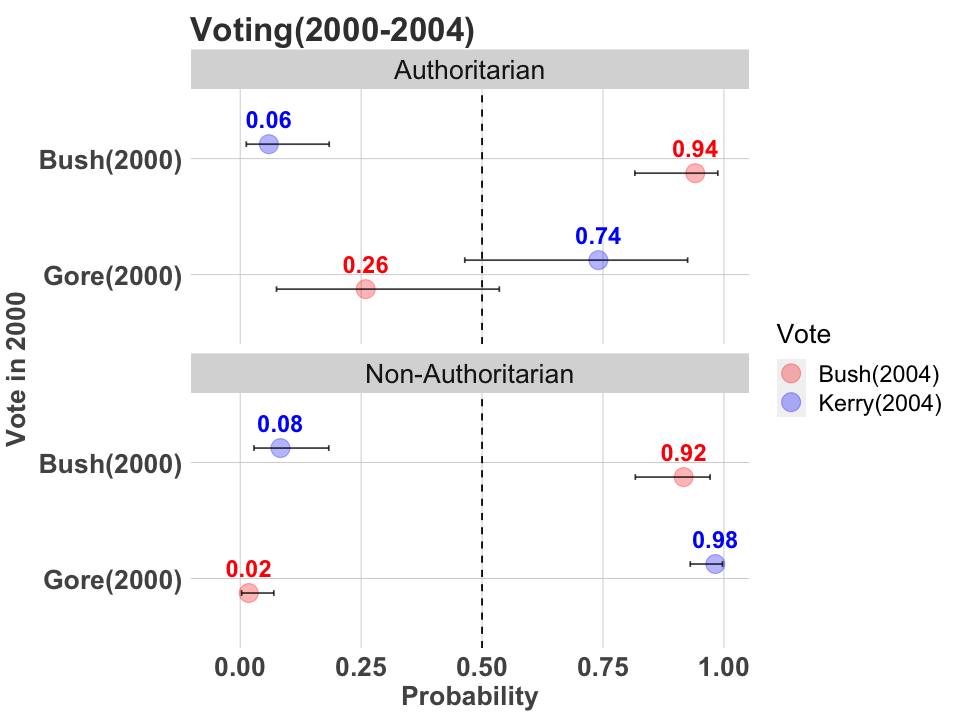

In [39]:
options(repr.plot.width=8, repr.plot.height=6)
 plot_dat %>% subset(election_year =="2000-2004") %>%
mutate(Voter = factor(Voter, levels=c("Gore(2000)", "Bush(2000)"))) %>%
mutate(vote = factor(vote, levels=c("Bush(2004)", "Kerry(2004)"))) %>%
ggplot(aes(x = as.factor(Voter),
                  y = mean, ymin=max,
                  colour = vote,
                  group = vote,
                  ymax=min, label = round(mean,2)))+
facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=5, alpha = 0.3, position = position_dodge(width = 0.5)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.5)) +
    ggtitle("Voting(2000-2004)") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("Vote in 2000") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.5), show.legend = FALSE)+
  scale_colour_manual(name="Vote ", values=c("red",  "blue")) +
  coord_flip()

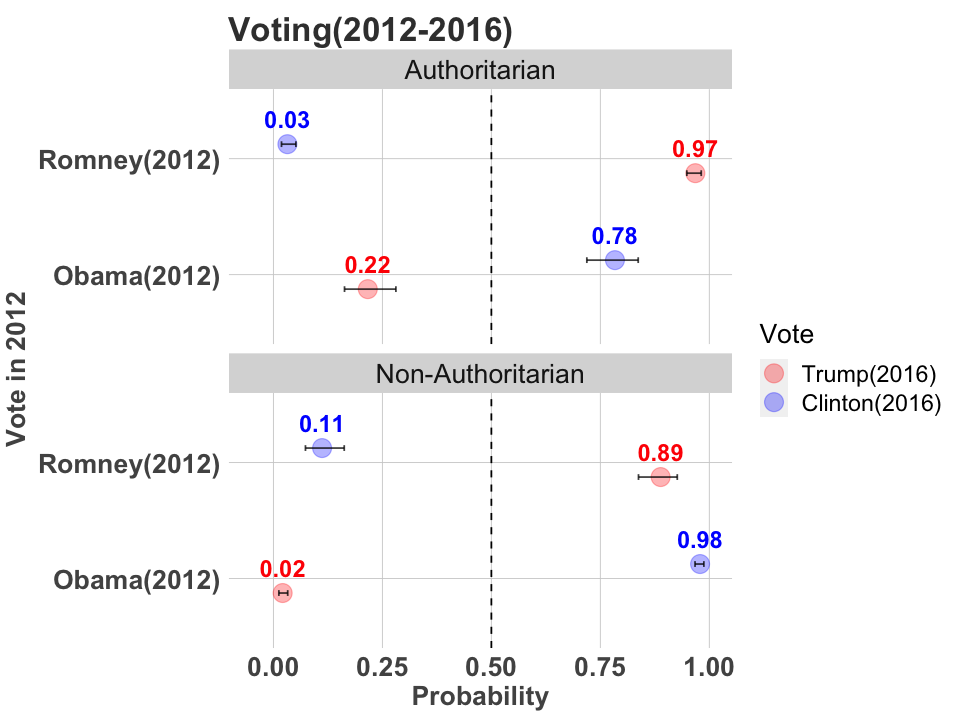

In [42]:
p2

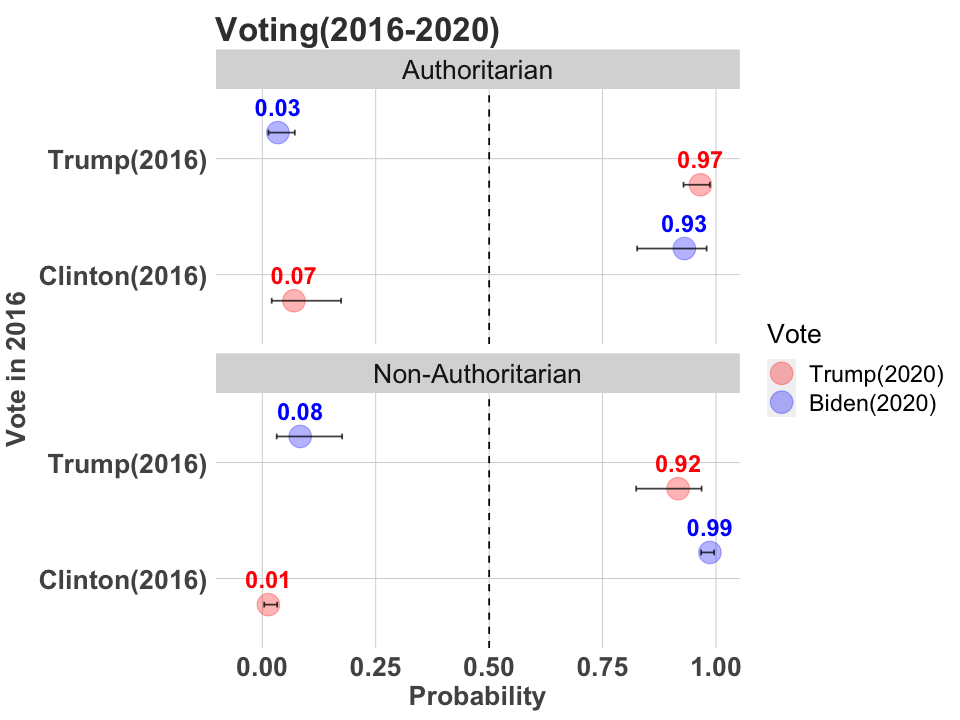

In [41]:

p3 = plot_dat %>% subset(election_year =="2016-2020") %>%
mutate(vote = factor(vote, levels=c("Trump(2020)", "Biden(2020)"))) %>%


ggplot(aes(x = as.factor(Voter),
                  y = mean, ymin=max,
                  colour = vote,
                  group = vote,
                  ymax=min, label = round(mean,2)))+
facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Voting(2016-2020)") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("Vote in 2016") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Vote ", values=c("red",  "blue")) +
  coord_flip()

p3


# Cohort analysis

This analysis is pretty intereresting. We can't say much about 2000-2004 -- there just isn't enough data. So, I'll just focus on 2012-2016 and 2016-2020 -- i.e., Trump led conversion.

The cohort analysis is important, I think, as we can't say a whole lot about what kinds of authoritarians are changing. 

In [31]:
## Print the six cohort models
## 3 years (1-3: No three way interaction; 4-6 three way interaction)
load("/Users/Chris/Dropbox/github_repos/Authoritarianism_V2/clean_data/chapter7_cohorts.rda")
for(i in 1:3)
    print(dat[[i]]%>% as.formula)

# load("/Users/Chris/Dropbox/github_repos/Authoritarianism_V2/clean_data/chapter7_models_cohorts.rda")
# for(i in 1:6)
#     print(dat[[i]]%>% as.formula)



authoritarianism ~ gen_x + boomer 
authoritarianism ~ millenial + gen_x + boomer 
authoritarianism ~ millenial + gen_x + boomer 


In [41]:
options(repr.plot.width=10, repr.plot.height=7)
zap_labels(dat2000) %>%
            data_grid(boomer = c(0,1),
                      gen_x = c(0,1)
                      ) %>%
                      filter(!(boomer ==1 & gen_x ==1)) %>%
                      add_linpred_draws(dat[[1]]) %>%
                      mutate(Authoritarianism = .linpred) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(gen_x ==1, "Generation X", "Greatest/Silent"))) %>%
                      group_by(generation) %>%
                      summarize(mean = quantile(Authoritarianism, prob =  0.5),
                                min  = quantile(Authoritarianism, prob = 0.025),
                                max  = quantile(Authoritarianism, prob = 0.975))

generation,mean,min,max
<chr>,<dbl>,<dbl>,<dbl>
Boomer,0.4448928,0.4155462,0.4744089
Generation X,0.4891246,0.4539673,0.5272439
Greatest/Silent,0.5044174,0.4737522,0.5357925


In [44]:
options(repr.plot.width=10, repr.plot.height=7)
zap_labels(dat2012) %>%
            data_grid(millenial = c(0,1),
                      boomer = c(0,1),
                      gen_x = c(0,1)
                      ) %>%
                      # Absolutely a better way...
                      filter(!((boomer ==1 & gen_x ==1)|(boomer ==1 & millenial ==1)|(millenial ==1 & gen_x ==1))) %>%
                      add_linpred_draws(dat[[2]]) %>%
                      mutate(Authoritarianism = .linpred) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(millenial ==1, "Millenial",
                                                 ifelse(gen_x ==1, "Generation X", "Greatest/Silent")))) %>%

                      group_by(generation) %>%
                      summarize(mean = quantile(Authoritarianism, prob =  0.5),
                                min  = quantile(Authoritarianism, prob = 0.025),
                                max  = quantile(Authoritarianism, prob = 0.975))

generation,mean,min,max
<chr>,<dbl>,<dbl>,<dbl>
Boomer,0.4907584,0.4787823,0.5035960
Generation X,0.4031556,0.3821139,0.4228872
Greatest/Silent,0.4887892,0.4703304,0.5056763
Millenial,0.3180986,0.2741529,0.3606565


Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”


ERROR: Error in pid.r(): could not find function "pid.r"


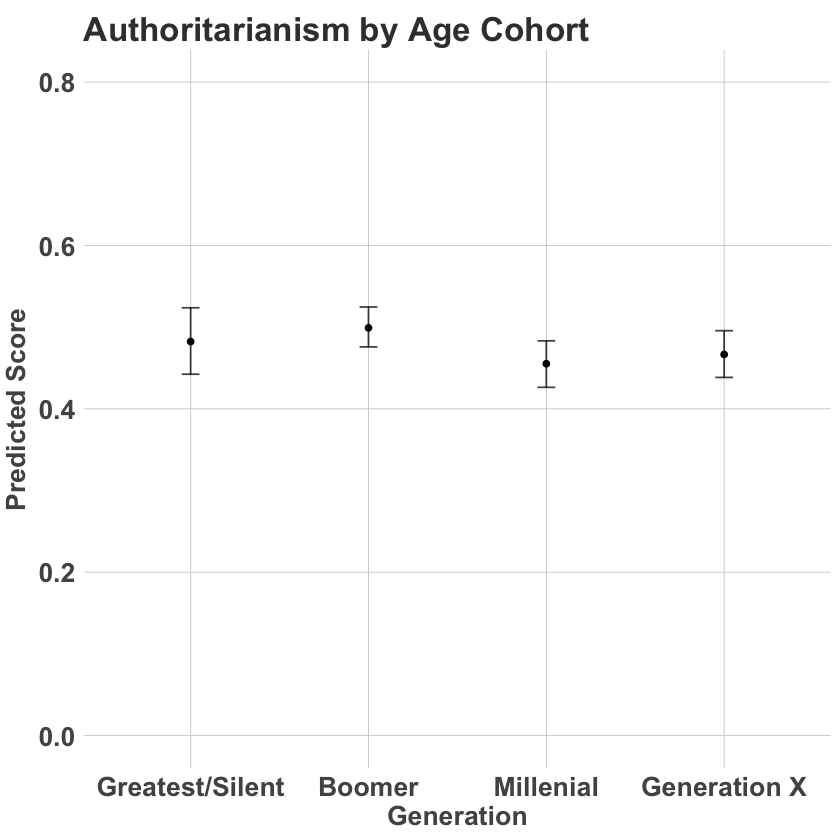

In [64]:
options(repr.plot.width=7, repr.plot.height=7)
zap_labels(dat2016) %>%
            data_grid(millenial = c(0,1),
                      boomer = c(0,1),
                      gen_x = c(0,1)
                      ) %>%
                      # Absolutely a better way...
                      filter(!((boomer ==1 & gen_x ==1)|(boomer ==1 & millenial ==1)|(millenial ==1 & gen_x ==1))) %>%
                      add_linpred_draws(dat[[3]]) %>%
                      mutate(Authoritarianism = .linpred) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(millenial ==1, "Millenial",
                                                 ifelse(gen_x ==1, "Generation X", "Greatest/Silent")))) %>%

                      group_by(generation) %>%
                      summarize(mean = quantile(Authoritarianism, prob =  0.5),
                                min  = quantile(Authoritarianism, prob = 0.025),
                                max  = quantile(Authoritarianism, prob = 0.975))  %>%
                    mutate(generation = factor(generation, levels=c("Greatest/Silent", "Boomer", "Millenial", "Generation X"))) %>%
ggplot(aes(x = as.factor(generation), ymin = min, ymax = max, y=mean), stat="identity", position=position_dodge()) +
                                geom_point(stat="identity", position=position_dodge())+
                                geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
                                 ggtitle("Authoritarianism by Age Cohort") +
                                 scale_y_continuous("Predicted Score", limits=c(0, 0.8)) +ggtheme +
                                 scale_x_discrete("Generation")


pid.r()

`summarise()` has grouped output by 'Voter', 'Authoritarianism'. You can
override using the `.groups` argument.


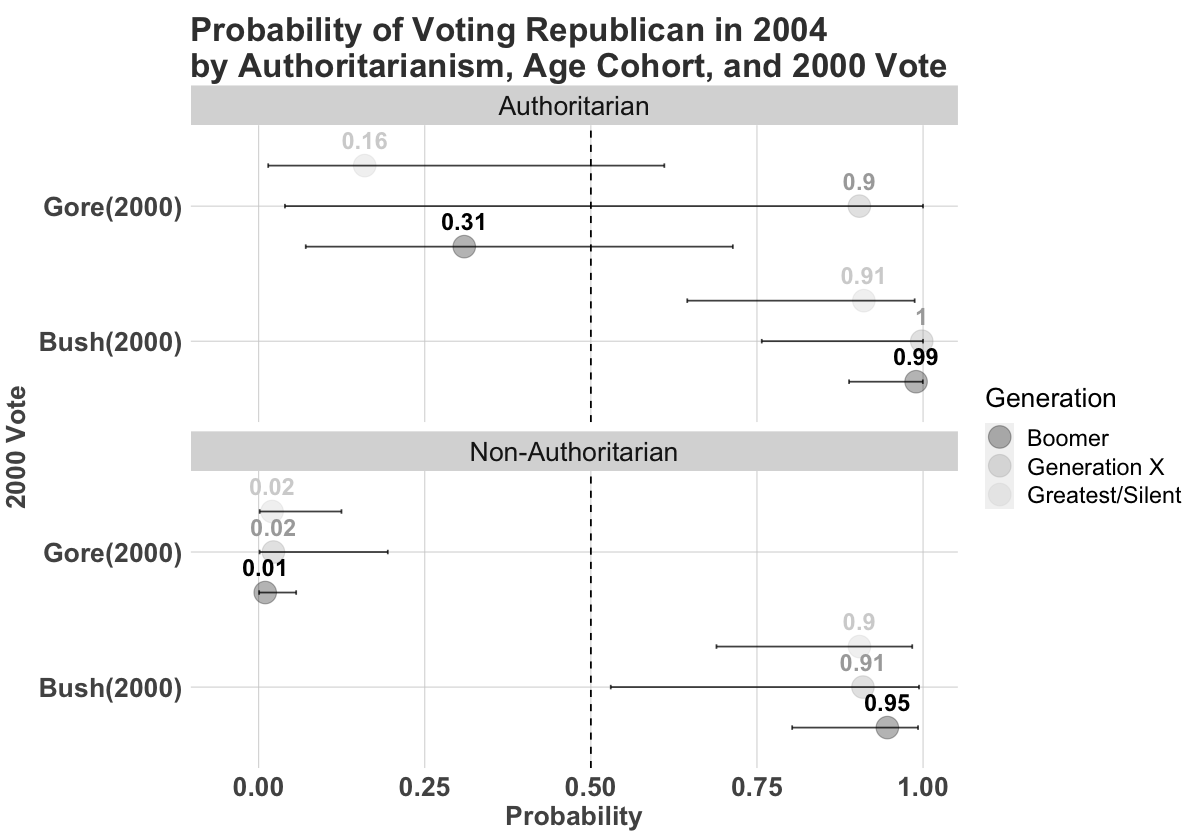

In [30]:
# Mean estimates over time

options(repr.plot.width=10, repr.plot.height=7)
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T),
                      age.2000 = mean(age.2000, na.rm = T),
                      college.2000 = mean(college.2000, na.rm = T),
                      income.2000 = mean(income.2000, na.rm = T),
                      authoritarianism = seq_range(authoritarianism, n = 2),
                      vote1 = seq_range(vote1, n = 2),
                      boomer = c(0,1),
                      gen_x = c(0,1),
                      ) %>%
                      filter(!(boomer ==1 & gen_x ==1)) %>%
                      mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                      add_linpred_draws(dat[[1]]) %>%
                      mutate(Vote_Republican = plogis(.linpred)) %>%
                      mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                      mutate(Voter = ifelse(vote1 == 1,  "Bush(2000)", "Gore(2000)")) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(gen_x ==1, "Generation X", "Greatest/Silent"))) %>%
                      group_by(Voter, Authoritarianism, generation) %>%
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>%
 ggplot(
              aes(x = Voter,
                  y = mean, ymin=max,
                  ymax=min, group = generation,
                  color = generation,
                  label = round(mean,2)))+
  facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Probability of Voting Republican in 2004\nby Authoritarianism, Age Cohort, and 2000 Vote") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2000 Vote") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Generation", values=c("black", "darkgrey", "lightgrey")) +
  coord_flip()


`summarise()` has grouped output by 'Voter', 'Authoritarianism'. You can
override using the `.groups` argument.


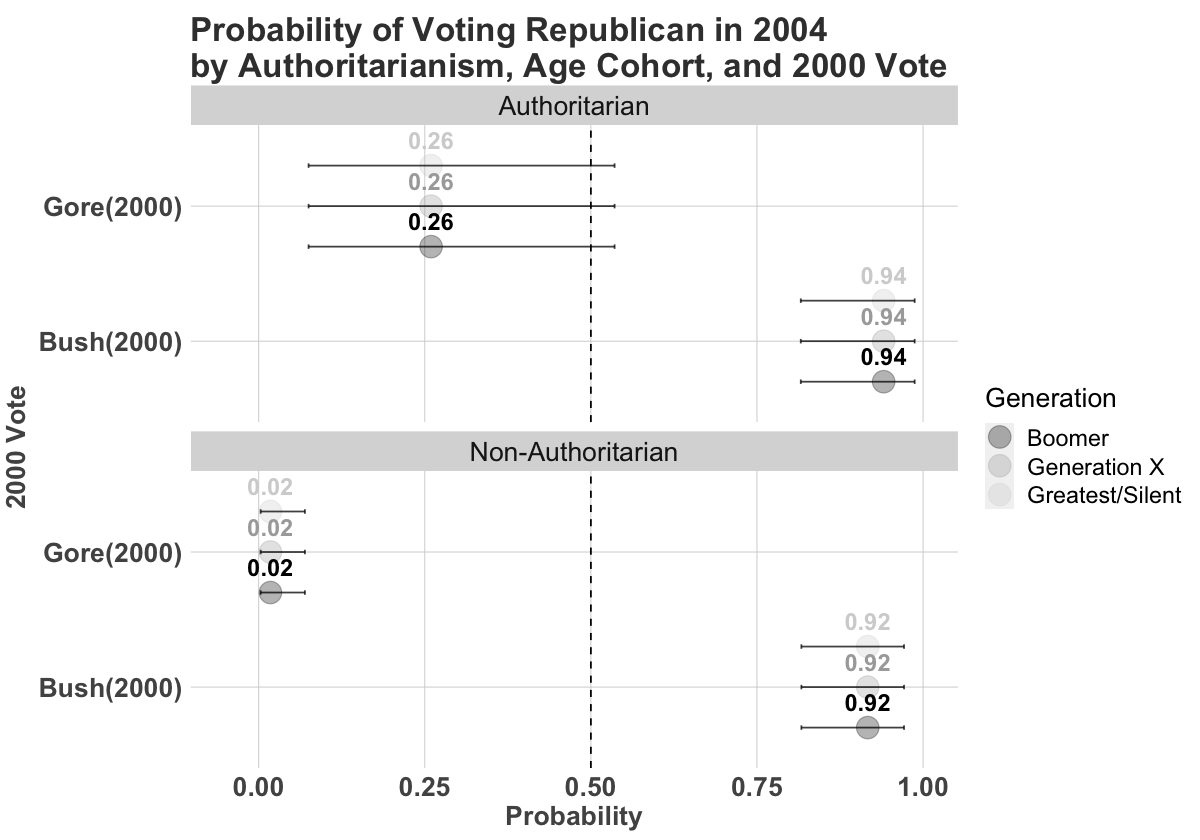

In [91]:
options(repr.plot.width=10, repr.plot.height=7)
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T),
                      age.2000 = mean(age.2000, na.rm = T),
                      college.2000 = mean(college.2000, na.rm = T),
                      income.2000 = mean(income.2000, na.rm = T),
                      authoritarianism = seq_range(authoritarianism, n = 2),
                      vote1 = seq_range(vote1, n = 2),
                      boomer = c(0,1),
                      gen_x = c(0,1),
                      ) %>%
                      filter(!(boomer ==1 & gen_x ==1)) %>%
                      mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                      add_linpred_draws(dat[[1]]) %>%
                      mutate(Vote_Republican = plogis(.linpred)) %>%
                      mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                      mutate(Voter = ifelse(vote1 == 1,  "Bush(2000)", "Gore(2000)")) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(gen_x ==1, "Generation X", "Greatest/Silent"))) %>%
                      group_by(Voter, Authoritarianism, generation) %>%
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>%
 ggplot(
              aes(x = Voter,
                  y = mean, ymin=max,
                  ymax=min, group = generation,
                  color = generation,
                  label = round(mean,2)))+
  facet_wrap(~ as.factor(Authoritarianism) , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Probability of Voting Republican in 2004\nby Authoritarianism, Age Cohort, and 2000 Vote") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2000 Vote") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Generation", values=c("black", "darkgrey", "lightgrey")) +
  coord_flip()


In [ ]:
zap_labels(dat2000) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2000 = mean(sex.2000, na.rm = T), age.2000 = mean(age.2000, na.rm = T),
                       college.2000 = c(0, 1),
                       income.2000 = mean(income.2000, na.rm = T),
                       authoritarianism = seq_range(authoritarianism, n = 2),
                       vote1 = seq_range(vote1, n = 2)) %>%
                       mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                       add_linpred_draws(dat[[1]]) %>%
                       mutate(Vote_Republican = plogis(.linpred)) %>%
                       mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                       mutate(Voter = ifelse(vote1 == 1,  "Bush(2000)", "Gore(2000)")) %>%
                       mutate(Education = ifelse(college.2000 == 1,  "College", "Less than College")) %>%
                       group_by(Voter, Authoritarianism, Education) %>%
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>%
ggplot(
              aes(x = as.factor(Voter),
                  y = mean, ymin=max,
                  ymax=min, label = round(mean,2)))+
  facet_wrap(~as.factor(Authoritarianism) + Education, nrow = 2) +
  geom_point(size=6, colour = "darkgrey", alpha = 0.75) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black") +
  ggtitle("Probability of Voting \nfor George W. Bush in 2004") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2000 Vote") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5)+
  coord_flip()

`summarise()` has grouped output by 'Voter', 'Authoritarianism'. You can
override using the `.groups` argument.


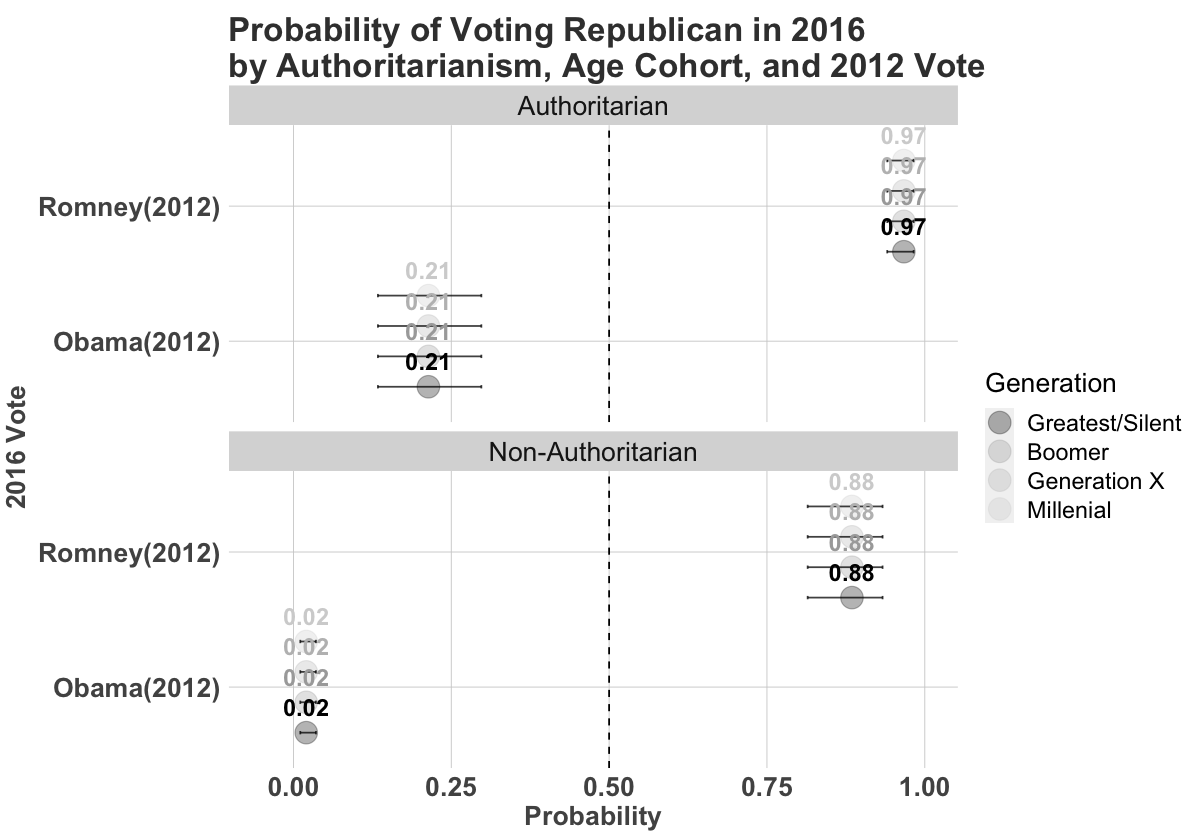

In [95]:
options(repr.plot.width=10, repr.plot.height=7)
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T),
                      age.2012 = mean(age.2012, na.rm = T),
                      college.2012 = c(0,1),
                      income.2012 = mean(income.2012, na.rm = T),
                      authoritarianism = seq_range(authoritarianism, n = 2),
                      vote1 = seq_range(vote1, n = 2),
                      boomer = c(0,1),
                      gen_x = c(0,1),
                      millenial = c(0, 1),
                      ) %>%
                      filter(!(boomer ==1 & gen_x ==1)) %>%
                      filter(!(boomer ==1 & millenial ==1)) %>%
                      filter(!(gen_x ==1  & millenial ==1)) %>%
                      mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                      add_linpred_draws(dat[[2]]) %>%
                      mutate(Vote_Republican = plogis(.linpred)) %>%
                      mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                      mutate(Voter = ifelse(vote1 == 1,  "Romney(2012)", "Obama(2012)")) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(gen_x ==1, "Generation X",
                                                ifelse(millenial ==1, "Millenial", "Greatest/Silent"))) %>% as.factor()) %>%
                      group_by(Voter, Authoritarianism, generation) %>%
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975))  %>%
                    mutate(generation = factor(generation, levels=c('Greatest/Silent', 'Boomer', 'Generation X', "Millenial"))) %>%

 ggplot(
              aes(x = Voter,
                  y = mean, ymin=max,
                  ymax=min, group = generation,
                  color = generation,
                  label = round(mean,2)))+
  facet_wrap(~ as.factor(Authoritarianism)  , nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Probability of Voting Republican in 2016\nby Authoritarianism, Age Cohort, and 2012 Vote") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2016 Vote") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Generation", values=c("black", "darkgrey", "grey", "lightgrey")) +
  coord_flip()

There's a great amount of uncertainty, volatility among Millenial voters. They are most likely to change -- authoritarians and non-authoritarians alike. Look at the "stickiness" for the GOP -- non-authoritarians of all generations are more likely to consistently vote Republican than are their authoritarian counterparts. 

`summarise()` has grouped output by 'Voter', 'Authoritarianism'. You can
override using the `.groups` argument.


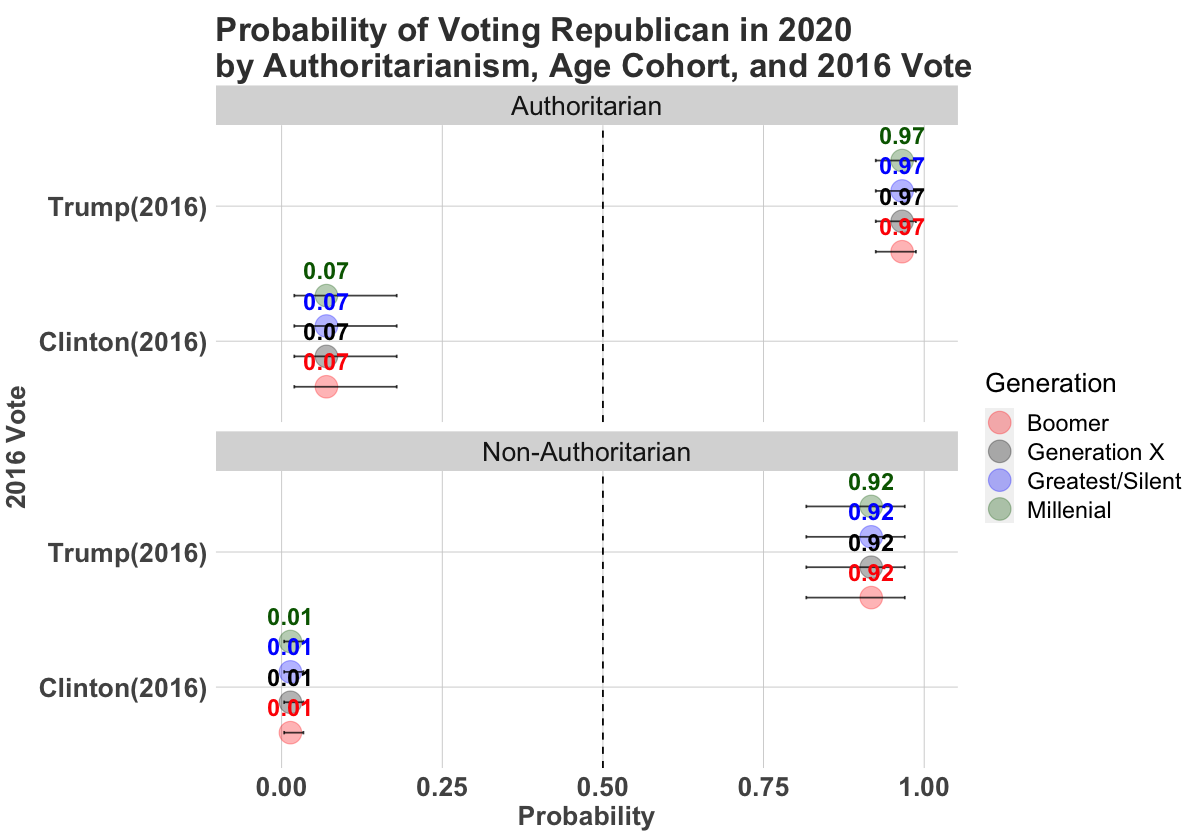

In [92]:
options(repr.plot.width=10, repr.plot.height=7)
zap_labels(dat2016) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(female.2016 = mean(female.2016, na.rm = T),
                      age.2016 = mean(age.2016, na.rm = T),
                      college.2016 = c(0,1),
                      income.2016 = mean(income.2016, na.rm = T),
                      authoritarianism = seq_range(authoritarianism, n = 2),
                      vote1 = seq_range(vote1, n = 2),
                      boomer = c(0,1),
                      gen_x = c(0,1),
                      millenial = c(0, 1),
                      ) %>%
                      filter(!(boomer ==1 & gen_x ==1)) %>%
                      filter(!(boomer ==1 & millenial ==1)) %>%
                      filter(!(gen_x ==1  & millenial ==1)) %>%
                      mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                      add_linpred_draws(dat[[3]]) %>%
                      mutate(Vote_Republican = plogis(.linpred)) %>%
                      mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                      mutate(Voter = ifelse(vote1 == 1,  "Trump(2016)", "Clinton(2016)")) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(gen_x ==1, "Generation X",
                                                ifelse(millenial ==1, "Millenial", "Greatest/Silent")))) %>%
                      group_by(Voter, Authoritarianism, generation) %>%
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975)) %>%
   ggplot(
              aes(x = Voter,
                  y = mean, ymin=max,
                  ymax=min, group = generation,
                  color = generation,
                  label = round(mean,2)))+
  facet_wrap(~ as.factor(Authoritarianism), nrow = 4) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Probability of Voting Republican in 2020\nby Authoritarianism, Age Cohort, and 2016 Vote") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2016 Vote") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Generation", values=c("red", "black", "blue", "darkgreen")) +
  coord_flip()

No real age cohort x education effects.

`summarise()` has grouped output by 'Voter', 'Authoritarianism', 'generation'.
You can override using the `.groups` argument.


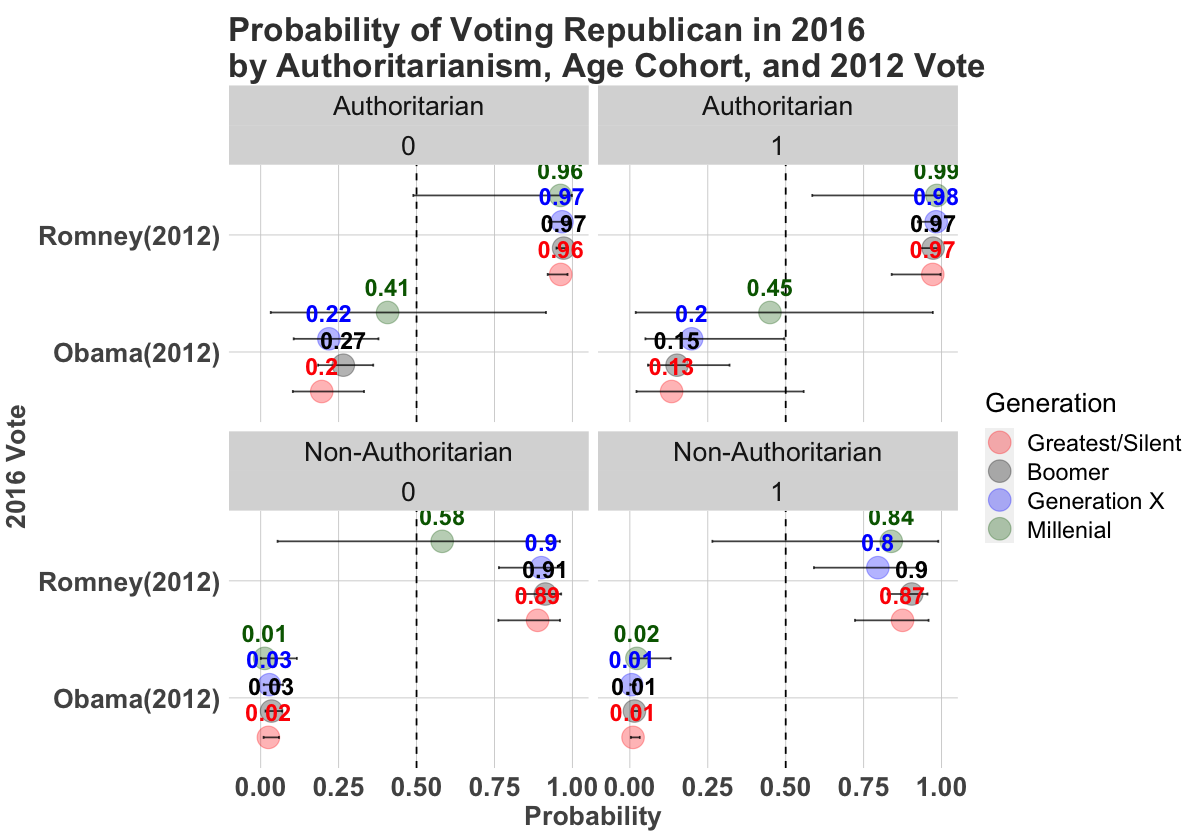

In [328]:
options(repr.plot.width=10, repr.plot.height=7)
zap_labels(dat2012) %>%  mutate(vote1 = as.vector(vote1)) %>%
            data_grid(sex.2012 = mean(sex.2012, na.rm = T),
                      age.2012 = mean(age.2012, na.rm = T),
                      college.2012 = c(0,1),
                      income.2012 = mean(income.2012, na.rm = T),
                      authoritarianism = seq_range(authoritarianism, n = 2),
                      vote1 = seq_range(vote1, n = 2),
                      boomer = c(0,1),
                      gen_x = c(0,1),
                      millenial = c(0, 1),
                      ) %>%
                      filter(!(boomer ==1 & gen_x ==1)) %>%
                      filter(!(boomer ==1 & millenial ==1)) %>%
                      filter(!(gen_x ==1  & millenial ==1)) %>%
                      mutate(authoritarianism_2 = authoritarianism*authoritarianism) %>%
                      add_linpred_draws(dat[[5]]) %>%
                      mutate(Vote_Republican = plogis(.linpred)) %>%
                      mutate(Authoritarianism = recode(authoritarianism, `0` = "Non-Authoritarian", `1` = "Authoritarian")) %>%
                      mutate(Voter = ifelse(vote1 == 1,  "Romney(2012)", "Obama(2012)")) %>%
                      mutate(generation = ifelse(boomer == 1, "Boomer",
                                            ifelse(gen_x ==1, "Generation X",
                                                ifelse(millenial ==1, "Millenial", "Greatest/Silent"))) %>% as.factor()) %>%
                      group_by(Voter, Authoritarianism, generation, college.2012) %>%
                      summarize(mean = quantile(Vote_Republican, prob =  0.5),
                                min  = quantile(Vote_Republican, prob = 0.025),
                                max  = quantile(Vote_Republican, prob = 0.975))  %>%
                    mutate(generation = factor(generation, levels=c('Greatest/Silent', 'Boomer', 'Generation X', "Millenial"))) %>%

 ggplot(
              aes(x = Voter,
                  y = mean, ymin=max,
                  ymax=min, group = generation,
                  color = generation,
                  label = round(mean,2)))+
  facet_wrap(~ as.factor(Authoritarianism) + college.2012) +
  geom_point(size=6, alpha = 0.3, position = position_dodge(width = 0.9)) +
  geom_errorbar(width = 0.10, alpha=0.75, colour = "black", position = position_dodge(width = 0.9)) +
  ggtitle("Probability of Voting Republican in 2016\nby Authoritarianism, Age Cohort, and 2012 Vote") +
  ggtheme +
  scale_y_continuous("Probability", limits=c(-0.05,1))+
  scale_x_discrete("2016 Vote") +
  geom_hline(yintercept = 0.5, colour = "black", linetype = "dashed") +
  geom_text(aes(fontface = 2), vjust = -1, size = 5, position = position_dodge(width = 0.9), show.legend = FALSE)+
  scale_colour_manual(name="Generation", values=c("red", "black", "blue", "darkgreen")) +
  coord_flip()